# 一、資料匯入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)，可自行更換可用字體
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

pd.set_option("display.max_columns",50) #設定pandas最多顯示出50個欄位資訊
pd.set_option("display.html.table_schema",True)
df_ml = pd.read_csv('tw_house.csv', encoding='big5') #台北市
df_ml.sample(5) #隨機取其中5筆資料

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
453,萬華區,11.36,38.65,98318,1,1,1,0.00,0,42,64,106,380.0000,0,0,0,0,0,0,0,0,0,0,0,1
190,松山區,4.44,46.05,210641,1,1,1,0.00,0,29,77,106,970.0000,0,0,0,0,0,0,0,0,0,0,1,0
77,中山區,12.82,69.48,290875,1,1,1,0.00,0,1,105,103,2021.0000,1,0,0,0,0,0,0,0,0,0,0,0
371,士林區,78.64,578.75,350089,0,0,0,178.28,12400000,2,104,106,15260.0000,0,0,0,0,0,0,1,0,0,0,0,0
437,中山區,13.35,135.48,261720,3,2,2,0.00,0,1,105,106,3545.7769,1,0,0,0,0,0,0,0,0,0,0,0


# 二、檢查特徵相關性及線性關係

In [2]:
# 把DataFrame加上highlight背景色
def highlight_highcorr(s):
    is_high = ((s >= 0.6) & (s < 1)) #Series condition setting
    return ['background-color: yellow' if v else '' for v in is_high]

## 相關性分析

In [3]:
df_ml.corr().round(3).style.apply(highlight_highcorr)

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,總價元,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
土地移轉總面積平方公尺,1,0.678,0.069,0.34,0.22,0.242,0.39,0.348,-0.068,0.068,-0.009,0.515,-0.207,-0.107,0.039,0.157,0.06,0.08,0.121,-0.081,-0.056,0.116,-0.049,-0.109
建物移轉總面積平方公尺,0.678,1,0.272,0.197,0.06,0.153,0.736,0.625,-0.411,0.411,-0.083,0.862,-0.092,-0.021,0.033,0.121,0.018,0.092,0.062,-0.03,-0.001,-0.003,-0.058,-0.132
單價每平方公尺,0.069,0.272,1,-0.081,-0.007,0.018,0.26,0.368,-0.362,0.362,-0.046,0.567,0.056,0.05,0.084,-0.05,-0.13,0.006,0.04,-0.067,0.317,-0.125,0.096,-0.203
建物現況格局-房,0.34,0.197,-0.081,1,0.675,0.755,0.032,-0.008,0.097,-0.097,-0.041,0.069,-0.084,-0.117,-0.036,0.122,-0.039,0.017,0.021,-0.01,0.016,0.073,0.024,-0.022
建物現況格局-廳,0.22,0.06,-0.007,0.675,1,0.582,-0.043,-0.08,0.046,-0.046,-0.006,-0.015,-0.046,-0.15,-0.06,0.069,-0.031,0.028,0.052,-0.019,0.048,0.071,0.052,-0.04
建物現況格局-衛,0.242,0.153,0.018,0.755,0.582,1,0.015,-0.012,-0.031,0.031,-0.084,0.067,-0.011,-0.121,0.007,0.081,-0.035,0.034,0.039,-0.037,0.042,0.049,-0.032,-0.058
車位移轉總面積平方公尺,0.39,0.736,0.26,0.032,-0.043,0.015,1,0.739,-0.464,0.464,-0.086,0.631,-0.041,-0.049,0.005,0.101,0.066,0.053,0.046,-0.023,-0.016,0.014,-0.094,-0.106
車位總價元,0.348,0.625,0.368,-0.008,-0.08,-0.012,0.739,1,-0.359,0.359,-0.053,0.683,0.017,-0.021,-0.01,0.007,0.053,0.027,0.09,-0.031,-0.013,-0.012,-0.045,-0.087
屋齡,-0.068,-0.411,-0.362,0.097,0.046,-0.031,-0.464,-0.359,1,-1,0.143,-0.403,-0.068,0.003,0.091,-0.097,-0.076,-0.12,0.113,-0.005,0.019,-0.105,0.155,0.149
建築完成年,0.068,0.411,0.362,-0.097,-0.046,0.031,0.464,0.359,-1,1,-0.143,0.403,0.068,-0.003,-0.091,0.097,0.076,0.12,-0.113,0.005,-0.019,0.105,-0.155,-0.149


## 散佈圖矩陣

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d86fc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1117d55c0>]], dtype=object)

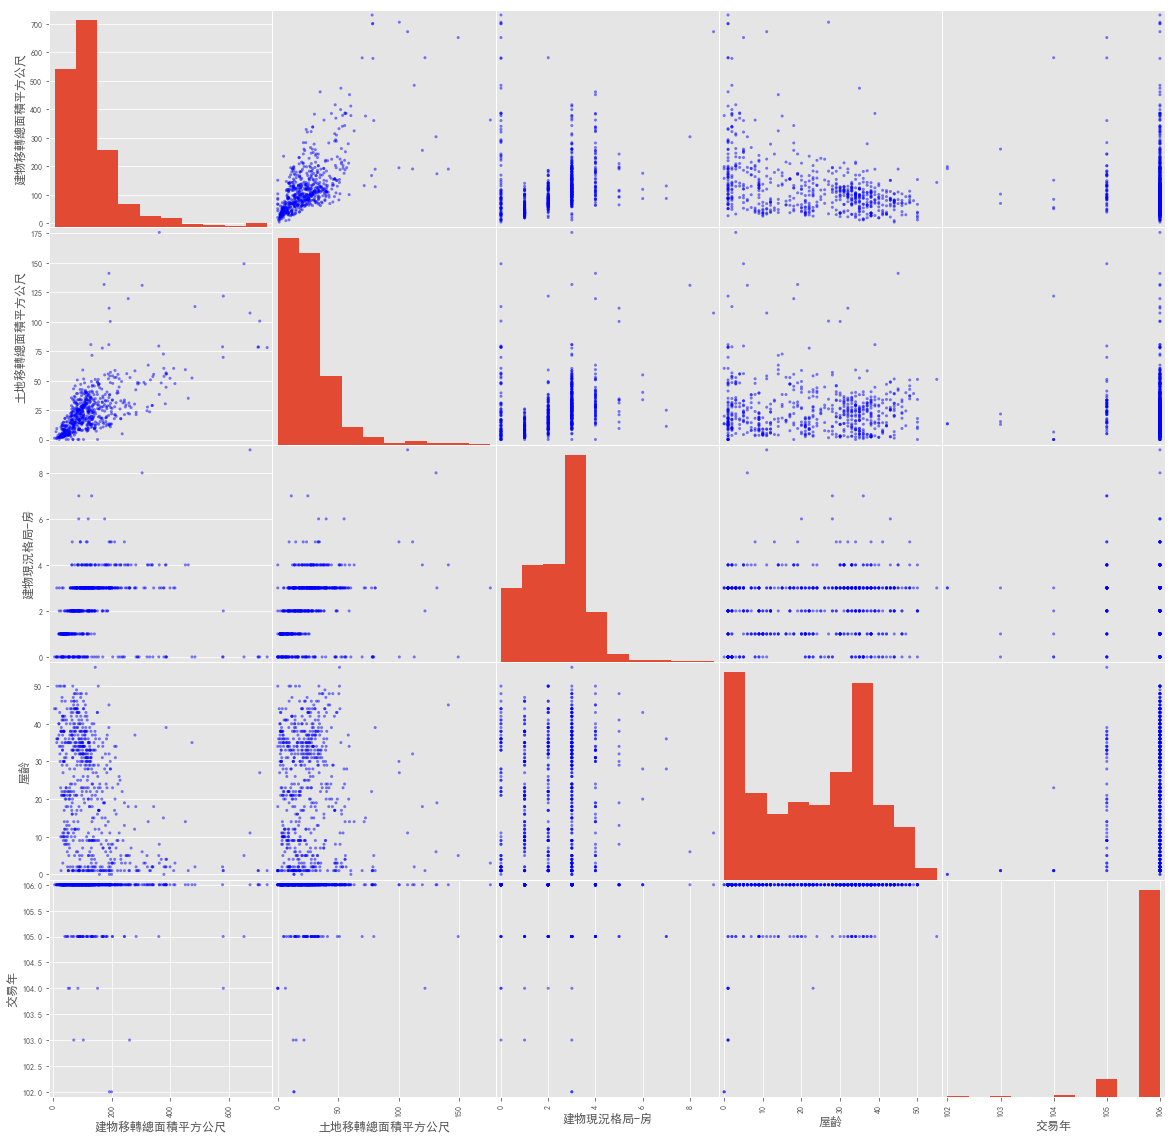

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_ml[['建物移轉總面積平方公尺','土地移轉總面積平方公尺','建物現況格局-房','屋齡','交易年']],figsize=(20, 20),color='b')

# 三、建模前預處理

## 切分訓練及測試資料

In [5]:
from sklearn.model_selection import train_test_split

X = df_ml[['建物移轉總面積平方公尺','土地移轉總面積平方公尺','單價每平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','建築完成年','交易年','中山區','中正區','信義區','內湖區','北投區','南港區','士林區','大同區','大安區','文山區','松山區','萬華區']]
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

,建物移轉總面積平方公尺,土地移轉總面積平方公尺,單價每平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,建築完成年,交易年,中山區,中正區,信義區,內湖區,北投區,南港區,士林區,大同區,大安區,文山區,松山區,萬華區
88,122.10,21.77,165438,2,2,2,32.91,0,9,97,106,0,0,0,1,0,0,0,0,0,0,0,0
209,230.62,32.83,130084,4,2,2,0.00,0,5,101,106,0,0,0,0,1,0,0,0,0,0,0,0
59,580.76,69.74,214022,0,0,0,309.76,15200000,1,105,105,0,0,0,1,0,0,0,0,0,0,0,0
365,32.33,8.52,247448,1,1,1,0.00,0,34,72,106,0,1,0,0,0,0,0,0,0,0,0,0
40,91.57,33.40,91515,5,2,2,0.00,0,38,68,105,0,0,0,0,0,0,0,0,0,1,0,0


## 標準化

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

## 產生高次方項

In [7]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2) #0~2次方

X_train_poly = quadratic.fit_transform(X_train_std)
X_test_poly = quadratic.fit_transform(X_test_std) 
X_poly = quadratic.fit_transform(X_std)

## plot_learning_curve function

In [8]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


# 四、線性迴歸

## 多變項

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_std, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_std) - y_test) ** 2))
print("R Square:",lr.score(X_test_std, y_test))

各變項參數: [[ 2412.64318507  -211.54089474   979.31204174   -11.77654267
    -53.16687699  -103.24845254  -563.90008522   567.12783379
     80.19256582   -80.19256582    19.47921385    -6.78942344
    -21.50429157   -84.35601602   -35.26087436    -3.40748001
     -6.66764111   128.0136338    -15.51317747    -6.88494767
      3.36636925   -41.42106477    64.86589042]]
MSE: 408632.60
R Square: 0.8911160587


<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

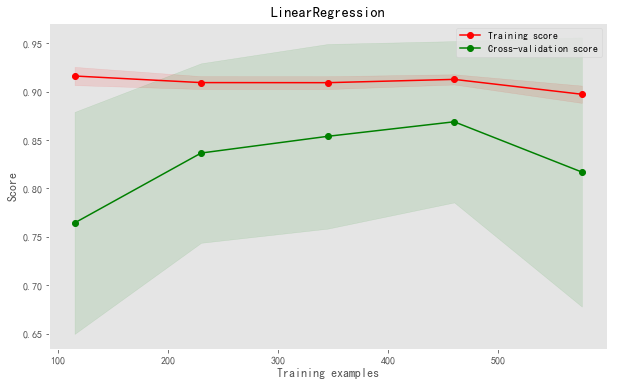

In [10]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "LinearRegression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 非線性

In [11]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_poly) - y_test) ** 2))
print("R Square:",lr.score(X_test_poly, y_test))

各變項參數: [[ -2.48978907e-11   1.83801333e+03  -1.46495390e+01   8.14836381e+02
    5.03059790e+00  -4.27781547e+00   1.46722378e+01  -1.39319817e+02
   -3.79389013e+02  -5.68847697e+13  -5.68847697e+13  -7.28389296e+12
   -5.09253470e+13  -8.86841889e+13  -6.40831545e+13   3.45656725e+13
   -4.11273748e+13   8.79426419e+13  -2.64192539e+13   4.76805819e+13
   -1.08649732e+14  -1.04975313e+14   4.86692797e+13   2.87667642e+13
   -5.51455744e+01   4.64684768e+01   7.47835398e+02  -2.41938829e+00
   -1.19602138e+01   2.35782800e+01   2.48081468e+01  -3.43127108e+01
   -2.55762001e+13  -2.55762001e+13  -4.11848380e+01   2.76617808e+12
    1.75904186e+12   1.61979320e+12   2.94924959e+12   2.28062041e+12
    1.50489592e+12   2.20965829e+12   1.58260622e+12   1.88556712e+12
    2.10939425e+12   1.79175607e+12   2.10939425e+12  -8.52062342e+00
   -1.84127662e+01   9.67704127e+00   5.71166582e+00  -2.68967466e+01
   -6.64265832e+00   2.33414573e+00   1.02086730e+13   1.02086730e+13
    2.5485712

<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

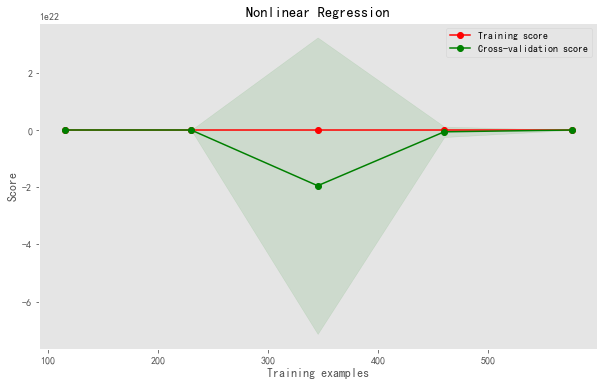

In [12]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = LinearRegression()

plot_learning_curve(estimator, "Nonlinear Regression", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 五、脊迴歸(Ridge Regression): L2 正規化

## 多變項

In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train_std, y_train)

print('各變項參數:', ridge.coef_)
print("MSE: %.2f" % np.mean((ridge.predict(X_test_std) - y_test) ** 2))
print("R Square:",ridge.score(X_test_std, y_test))

各變項參數: [[  2.38754322e+03  -1.99584625e+02   9.76534269e+02  -1.05086577e+01
   -5.45275773e+01  -1.02250381e+02  -5.48837865e+02   5.66114431e+02
    7.77033381e+01  -7.77033381e+01   1.92870640e+01  -6.22230904e+00
   -2.02315224e+01  -8.33888344e+01  -3.62702980e+01  -5.08954436e+00
   -6.79425026e+00   1.28508861e+02  -1.50298689e+01  -5.13234909e+00
    1.01752213e+00  -4.01816444e+01   6.44864406e+01]]
MSE: 405194.46
R Square: 0.892032183473


<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

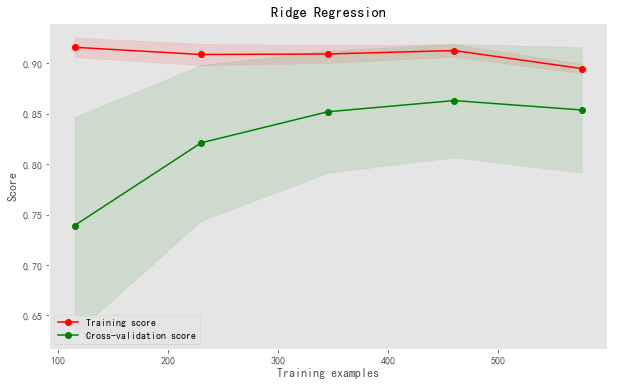

In [14]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Ridge(alpha=1)

plot_learning_curve(estimator, "Ridge Regression", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 高次方項

In [15]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_poly, y_train)

print('各變項參數:', ridge.coef_)
print("MSE: %.2f" % np.mean((ridge.predict(X_test_poly) - y_test) ** 2))
print("R Square:",ridge.score(X_test_poly, y_test))

各變項參數: [[  0.00000000e+00   1.71293679e+03   4.14312999e+01   8.01992926e+02
    2.09549306e+01  -1.45577259e+01   2.73583279e+01  -1.10117692e+02
   -2.34751107e+02  -1.71065970e+01   1.71065970e+01  -4.89389465e+00
    1.04722215e+00   1.00271534e+00  -1.84967814e-01   4.26976103e-01
    2.40376958e-01   3.19805657e-01  -4.13759170e-01   5.33585767e-01
    1.80160744e+00  -1.69778785e+00  -9.36401710e-01  -2.23660781e+00
   -9.27365976e+00   3.38023612e+01   6.88079338e+02   4.75787160e+00
   -1.20784768e+01   1.57345445e+01  -1.31468091e+01  -5.32649657e+01
   -3.10418922e+01   3.10418922e+01   1.21012816e+00   1.53264294e+01
    1.16609705e+01  -1.25358198e+01  -1.31305333e+01  -2.94631457e+01
    1.59082628e+01  -2.55819574e+01   1.16746138e+01   7.25834547e+01
   -2.58267743e+01  -4.09605385e+00   1.13062305e+00  -1.32010703e+01
    1.41957397e+01  -2.47801068e+00  -1.21052627e+01  -9.24936116e+00
    7.57229832e+00  -1.26202898e+01   1.61203415e+01  -1.61203415e+01
    1.9224114

<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

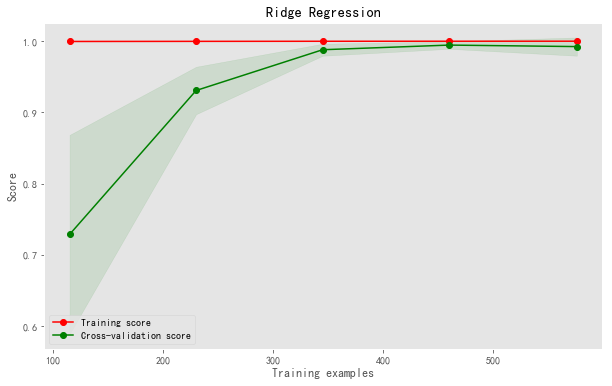

In [16]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Ridge(alpha=1)

plot_learning_curve(estimator, "Ridge Regression", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 六、LASSO: L1 正規化

## 多變項

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train_std, y_train)

print('各變項參數:', lasso.coef_)
print("MSE: %.2f" % np.mean((lasso.predict(X_test_std) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",lasso.score(X_test_std, y_test))

各變項參數: [  2.40355891e+03  -2.06136601e+02   9.76648537e+02  -1.12634379e+01
  -5.28805732e+01  -1.02364709e+02  -5.57431741e+02   5.65268381e+02
   1.56473970e+02  -0.00000000e+00   1.85505681e+01   7.72519373e-01
  -1.45948331e+01  -7.81274023e+01  -2.70317830e+01   1.19184148e+00
  -1.76185803e+00   1.34104457e+02  -9.81249472e+00  -0.00000000e+00
   7.11168742e+00  -3.43607538e+01   7.00894019e+01]
MSE: 406805.93
R Square: 0.891602792684


<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

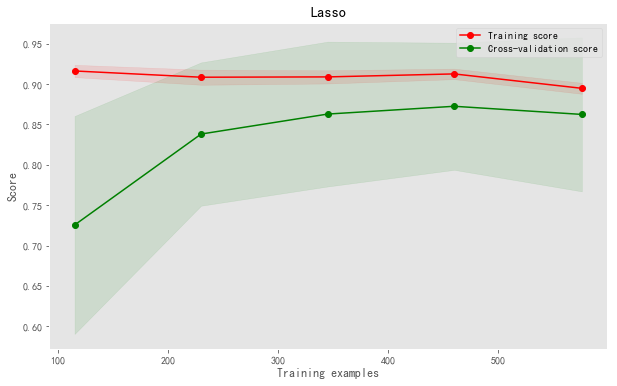

In [19]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Lasso(alpha=1)

plot_learning_curve(estimator, "Lasso", X_std, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

## 高次方項

In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X_train_poly, y_train)

print('各變項參數:', lasso.coef_)
print("MSE: %.2f" % np.mean((lasso.predict(X_test_poly) - y_test.values.ravel()) ** 2)) #.values.ravel()把矩陣轉成一維
print("R Square:",lasso.score(X_test_poly, y_test))

各變項參數: [  0.00000000e+00   1.77637838e+03   7.09746557e+00   8.08019874e+02
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -2.05253073e+01
  -1.51269287e+02   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
   5.22583155e+00   0.00000000e+00   7.18069574e+02   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   1.42856698e+01
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00   1.48194006e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000

/Users/pyda/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pyda/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/pyda/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

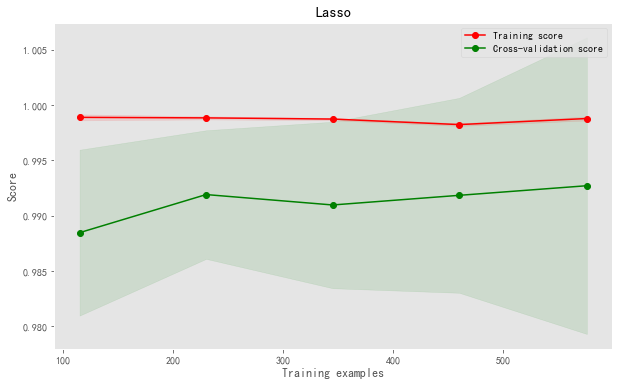

In [21]:
cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = Lasso(alpha=10)

plot_learning_curve(estimator, "Lasso", X_poly, y, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))

# 七、Elastic Net: L1+L2 正規化

In [22]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1)
elastic.fit(X_train_std, y_train)

print('各變項參數:', elastic.coef_)
print("MSE: %.2f" % np.mean((elastic.predict(X_test_std) - y_test.values.ravel()) ** 2))
print("R Square:",elastic.score(X_test_std, y_test))

各變項參數: [  9.92125493e+02   3.03895366e+02   6.45247695e+02   2.88076137e+01
  -7.65542226e+01  -2.46142023e+01   2.02271847e+02   5.05466839e+02
  -8.94386150e+01   8.94418385e+01   1.42200173e+01  -5.33635151e-01
   2.77237069e+01  -6.66047472e+00  -5.43091404e+01  -7.45590261e+01
  -7.19326224e+00   1.45127388e+02  -1.00817079e+01   8.83387565e+01
  -9.05449939e+01   1.69749257e+01   0.00000000e+00]
MSE: 531408.78
R Square: 0.858401210022


### Now, it's your turn...